## <img src="./logo_UTN.svg" align="right" width="150" /> 
#### Procesamiento Digital de Señales

# Trabajo Práctico 3
#### Lisandro Robles

***
## Estimación espectral


<div class="alert alert-block alert-info">
<b>1)</b> Compruebe experimentalmente las propiedades de sesgo y varianza del periodograma.
</div>

<div class="alert alert-block alert-success">
<b>Ayuda:</b> Puede utilizar una señal aleatoria con valores normalmente distribuidos de media nula y varianza **NO** unitaria, es decir $ x \sim \mathcal{N}(\mu=0,\sigma^2=2)$

</div>

Es decir, que el periodograma es un estimador de la densidad de potencia espectral (Ver Hayes 8.2.2):

$$ \hat{P_P}(e^{\frac{2\pi·k·f_S}{N}}) = \hat{P_P}(k) = \frac{1}{N}· \lvert X(k) \rvert ^2  $$

 + **no sesgado asintóticamente** a medida que aumenta la ventana de registro N.
 + tiene varianza constante y **NO** depende de N.

In [1]:
#####################################################
# Paquetes necesarios para realizar el ejercicio #1 #
#####################################################

#Paquetes estándar

#Paquete numérico
import numpy as np
#Paquete gráfico
import matplotlib.pyplot as plt
#Paquete de manejo de datos
from pandas import DataFrame
#Paquete para mostrar el dataframe
from IPython.display import HTML

#Paquete propios

#Paquete que implementa la clase generador de señales
import pdsmodulos.signal_generator as gen
#Paquete que implementa la clase analizador de espectro
import pdsmodulos.spectrum_analyzer as sa


In [2]:
###############################
# Parámetros de la simulación #
###############################

#Largos de señal para los cuales se realizara la simulación
N = np.array([8,16,32, 64, 128, 256, 512, 1024, 2048, 4096], dtype = int)

#Frecuencia de muestreo
fs = 1024

#Cantidad de realizaciones
S = 100

In [3]:
##############
# Simulación #
##############

#Aca se almacenaran los resultados
tus_resultados = []
sesgos = np.zeros([np.size(N),],dtype = float)
varianzas = np.zeros([np.size(N),],dtype = float)

#Contador
j = 0

#Para cada largo de señal
for Ni in N:

    #Enciendo el generador de funciones
    generador = gen.signal_generator(fs,Ni)

    #Enciendo el analizador de espectro
    analizador = sa.spectrum_analyzer(fs,Ni,"fft")

    #Lista en que alamacenre las distribuciones para cada realizacion
    dist = []

    #Distribucion elegida para cada realizacion (todas normales)
    for i in range(0,S):
        dist.append("normal")

    #Media - Todas las realizaciones de media 0
    u = np.zeros((S,1),dtype = float)

    #Varianza - Todas las realizaciones de desvio estandar de raiz de 2
    s = np.sqrt(2)*np.ones((S,1),dtype = float)

    #Llamo al metodo que genera ruido blanco
    #Genera una matriz de NxS, donde N = Filas y S = Columnas
    (t,x) = generador.noise(dist,u,s)

    #Realizo de forma matricial el modulo del espectro de todas las realizaciones
    (f,Xmod) = analizador.module(x,xaxis = 'phi')
    #Para pasar de veces a psd tengo que dividir por dos, luego elevar al cuadrado y volver a multiplicar por dos
    Xpsd = np.transpose(np.array([[Xij/2 if (Xij != Xi[0] and Xij != Xi[np.size(Xmod,0)-1]) else Xij for Xij in Xi] for Xi in np.transpose(Xmod)],dtype = float))
    Xpsd = 2*np.power(Xpsd,2)

    #Una vez que tengo todas las realizaciones de la PSD le calculo el espectro promedio. 
    #Esto quiere decir, calcular la media de ca
    #da fila. Si la matriz es de NxS. Me tiene que quedar una matriz de Nx1
    #Es decir, el promedio a cada frecuencia
    m = np.mean(Xpsd,1)

    #Calculo el area de ese espectro "promedio"
    valor_esperado = np.sum(m)

    sesgo = valor_esperado - np.power(s[0,0],2)

    #Calculo la varianza a cada frecuencia
    v = np.var(Xpsd,1)

    #Calculo el area de eso
    #TODO: Tengo un error de escala con esto. DETECTAR la fuente del problema
    varianza = (Ni/2)*np.sum(v)

    #Almaceno los resultados para esta largo de señal
    tus_resultados.append([str(sesgo),str(varianza)])

    #Sesgos
    sesgos[j] = sesgo

    #Varianzas
    varianzas[j] = varianza

    #Aumento el contador
    j = j + 1

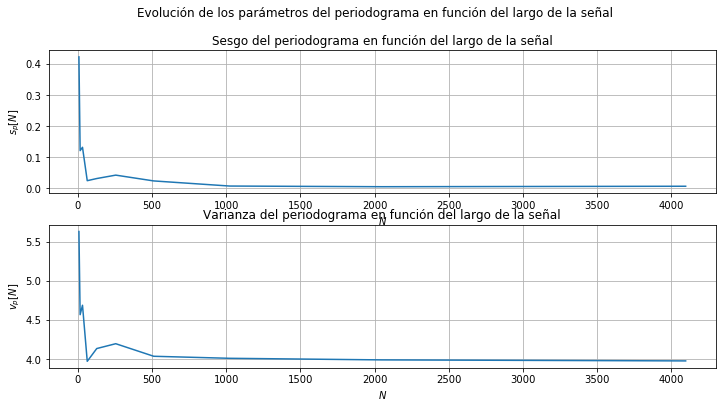

In [4]:
#######################################
# Presentación gráfica de resultados  #
#######################################

#Presentación gráfica de resultados
plt.figure()
fig, axarr = plt.subplots(2, 1,figsize = (10,5)) 
fig.suptitle('Evolución de los parámetros del periodograma en función del largo de la señal',fontsize=12,y = 1.08)
fig.tight_layout()

axarr[0].plot(N,sesgos)
axarr[0].set_title('Sesgo del periodograma en función del largo de la señal')
axarr[0].set_ylabel('$s_{p}[N]$')
axarr[0].set_xlabel('$N$')
axarr[0].set_ylim((1.1*min(sesgos),max(sesgos)*1.1))
axarr[0].axis('tight')
axarr[0].grid()

axarr[1].plot(N,varianzas)
axarr[1].set_title('Varianza del periodograma en función del largo de la señal')
axarr[1].set_ylabel('$v_{p}[N]$')
axarr[1].set_xlabel('$N$')
axarr[1].set_ylim((1.1*min(varianzas),max(varianzas)*1.1))
axarr[1].axis('tight')
axarr[1].grid()

In [5]:
########################################
# Presentación analítica de resultados #
########################################

df = DataFrame(tus_resultados, columns=['$s_P$', '$v_P$'],index=N)

HTML(df.to_html())


,$s_P$,$v_P$
8,0.422885363627,5.6314433752
16,0.121624453547,4.56859113863
32,0.132259764789,4.68898739151
64,0.0249425759548,3.97276305856
128,0.0318543774786,4.13581926389
256,0.0428127185144,4.1976369612
512,0.0241545069071,4.03708204217
1024,0.00771539236756,4.01111365486
2048,0.00558166884356,3.99089044187
4096,0.0070792693138,3.97788202996


Del análisis de los resultados se ve que el periodograma es asintoticamente insesgado:

\begin{equation}
\lim_{N\to\infty} s_{p} = 0 
\end{equation}

Por otra parte, se ve que al aumentar la cantidad de muestras la varianza del periodograma no tiende a cero:

\begin{equation}
\lim_{N\to\infty} v_{p} = \sigma^{4} 
\end{equation}

De estas dos propiedades se puede concluir que el periodograma es un estimador incosistente de la potencia de señal $\sigma^{2}$.


<div class="alert alert-block alert-info">
<b>2)</b>     Compruebe del mismo modo los resultados de sesgo y varianza vistos en la teoría del método de Bartlett.

</div>

Es decir, que el periodograma de Bartlett es un estimador de la densidad de potencia espectral que promedia K bloques disjuntos de las N muestras de una señal $x$ (Ver Hayes 8.2.4):

$$ \hat{P_B}(k) = \frac{1}{N}· \sum^{K-1}_{i=0} \lvert X(k) \rvert ^2  $$

 + **no sesgado asintóticamente** a medida que aumenta la ventana de registro N.
 + tiene varianza que decrece asintóticamente a medida que aumenta K.
 + tiene una resolución espectral K veces menor

In [20]:
# Simular para los siguientes tamaños de señal
N = np.array([10, 50, 100, 250, 500, 1000, 5000], dtype=np.float)

##########################################
# Acá podés generar los gráficos pedidos #
##########################################


In [21]:

#######################################
# Tu simulación que genere resultados #
#######################################

tus_resultados = [ 
                   ['', ''], # <-- acá debería haber numeritos :)
                   ['', ''], # <-- acá debería haber numeritos :)
                   ['', ''], # <-- acá debería haber numeritos :)
                   ['', ''], # <-- acá debería haber numeritos :)
                   ['', ''], # <-- acá debería haber numeritos :)
                   ['', ''], # <-- acá debería haber numeritos :)
                   ['', ''], # <-- acá debería haber numeritos :)
                 ]
df = DataFrame(tus_resultados, columns=['$s_B$', '$v_B$'],
               index=N)
HTML(df.to_html())


,$s_B$,$v_B$
10.0,,
50.0,,
100.0,,
250.0,,
500.0,,
1000.0,,
5000.0,,


<div class="alert alert-block alert-info">
<b>3)</b>     Compruebe del mismo modo los resultados de sesgo y varianza vistos en la teoría del método de Welch.

</div>

Es decir, que el periodograma de Welch es un estimador de la densidad de potencia espectral que promedia K bloques ventaneados por $w(n)$, posiblemente solapados de las N muestras de una señal $x$ (Ver Hayes 8.2.5):

$$ \hat{P_W}(k) = \frac{1}{K·L·U}· \sum^{K-1}_{i=0} \Bigg\vert \sum^{L-1}_{n=0}  x(n+i·D) · w(n) · e^{-j2\pi·k·n·\frac{f_S}{N}} \Bigg\vert^2   $$

 + **no sesgado asintóticamente** a medida que aumenta la ventana de registro N.
 + tiene varianza que decrece asintóticamente, a medida que se promedian más bloques de señal.
 + tiene una resolución espectral inversamente proporcional al tamaño del bloque.

In [22]:
# Simular para los siguientes tamaños de señal
N = np.array([10, 50, 100, 250, 500, 1000, 5000], dtype=np.float)

##########################################
# Acá podés generar los gráficos pedidos #
##########################################


In [23]:

#######################################
# Tu simulación que genere resultados #
#######################################

tus_resultados = [ 
                   ['', ''], # <-- acá debería haber numeritos :)
                   ['', ''], # <-- acá debería haber numeritos :)
                   ['', ''], # <-- acá debería haber numeritos :)
                   ['', ''], # <-- acá debería haber numeritos :)
                   ['', ''], # <-- acá debería haber numeritos :)
                   ['', ''], # <-- acá debería haber numeritos :)
                   ['', ''], # <-- acá debería haber numeritos :)
                 ]
df = DataFrame(tus_resultados, columns=['$s_W$', '$v_W$'],
               index=N)
HTML(df.to_html())


,$s_W$,$v_W$
10.0,,
50.0,,
100.0,,
250.0,,
500.0,,
1000.0,,
5000.0,,


<div class="alert alert-block alert-info">
<b>4)</b> Evalue el siguiente estimador de frecuencia de una senoidal contaminada por ruido incorrelado.

</div>

Para una señal $ x(k) = a_1 · \mathop{sen}(\Omega_1·k) + n(k)$

siendo 

  $\Omega_1 = \Omega_0 + f_r·\frac{2\pi}{N} $

  $\Omega_0 = \frac{\pi}{2} $
  
y las variables aleatorias definidas por

  $f_r \sim \mathcal{U}(-\frac{1}{2}, \, \frac{1}{2}) $

  $n \sim \mathcal{N}(0, \, \sigma ^2) $
  
Evalúe el siguiente estimador de $\Omega_1$

  $\hat{\Omega}_1^W = \mathop{arg\ max}_f \{ \hat{P_W} \} $
  
basado en el periodograma de Welch evaluado en **3)**. Del mismo modo, evalúe otro estimador de la PSD para crear otro estimador de $\Omega_1$

  $\hat{\Omega}_1^X = \mathop{arg\ max}_f \{ \hat{P_X} \} $

Considere 200 realizaciones de 1000 muestras para cada experimento. Cada realización debe tener un SNR tal que el pico de la senoidal esté 3 y 10 db por encima del *piso* de ruido impuesto por $n(k)$.


<div class="alert alert-block alert-success">
<b>Ayuda:</b> Puede utilizar el módulo de análisis espectral **Spectrum** donde encontrará la mayoría de los métodos descriptos en el Capítulo 8 del libro de Hayes.

</div>

In [24]:
# Simular para los siguientes tamaños de señal

R = 200 # realizaciones

N = 1000 # Muestras

# Obtené los valores XX para que cumplas con el enunciado
#SNR = np.array([ XX, XX ], dtype=np.float)

##########################################
# Acá podés generar los gráficos pedidos #
##########################################


   a) ¿Qué estimador ha elegido? Explique brevemente los fundamentos principales y el enfoque del método elegido.


<div class="alert alert-block alert-warning">
<b>Respuesta:</b> Escriba aquí su respuesta.
</div>

   b) ¿Qué indicador considera que sería apropiado para poder comparar el rendimiento de ambos estimadores $i_j$?


<div class="alert alert-block alert-warning">
<b>Respuesta:</b> Escriba aquí su respuesta.
</div>

In [25]:

#######################################
# Tu simulación que genere resultados #
#######################################

# Una vez definido tu indicador de performance, calculalo y comparalo para las situaciones pedidas.
tus_resultados = [ 
                   ['', ''], # <-- acá debería haber numeritos :)
                   ['', ''] # <-- acá debería haber numeritos :)
                 ]
df = DataFrame(tus_resultados, columns=['$i_W$', '$i_X$'],
               index=[  
                        '3 dB',
                        '10 dB'
                     ])
HTML(df.to_html())


,$i_W$,$i_X$
3 dB,,
10 dB,,
